In [26]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Connect to drive
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
# Change to directory
%cd /content/drive/MyDrive/CMP7005 Air Quality Analysis

/content/drive/MyDrive/CMP7005 Air Quality Analysis


# Data Loading and Merging

In [28]:
# Load multiple datasets
ahmedabad_data = pd.read_csv('/content/drive/MyDrive/CMP7005 Air Quality Analysis/Datasets/Ahmedabad_data.csv')
aizawl_data = pd.read_csv('/content/drive/MyDrive/CMP7005 Air Quality Analysis/Datasets/Aizawl_data.csv')
amaravati_data = pd.read_csv('/content/drive/MyDrive/CMP7005 Air Quality Analysis/Datasets/Amaravati_data.csv')
amritsar_data = pd.read_csv('/content/drive/MyDrive/CMP7005 Air Quality Analysis/Datasets/Amritsar_data.csv')
bengaluru_data = pd.read_csv('/content/drive/MyDrive/CMP7005 Air Quality Analysis/Datasets/Bengaluru_data.csv')
bhopal_data = pd.read_csv('/content/drive/MyDrive/CMP7005 Air Quality Analysis/Datasets/Bhopal_data.csv')
brajrajnagar_data = pd.read_csv('/content/drive/MyDrive/CMP7005 Air Quality Analysis/Datasets/Brajrajnagar_data.csv')
chandigarh_data = pd.read_csv('/content/drive/MyDrive/CMP7005 Air Quality Analysis/Datasets/Chandigarh_data.csv')
chennai_data = pd.read_csv('/content/drive/MyDrive/CMP7005 Air Quality Analysis/Datasets/Chennai_data.csv')
coimbatore_data = pd.read_csv('/content/drive/MyDrive/CMP7005 Air Quality Analysis/Datasets/Coimbatore_data.csv')
delhi_data = pd.read_csv('/content/drive/MyDrive/CMP7005 Air Quality Analysis/Datasets/Delhi_data.csv')
ernakulam_data = pd.read_csv('/content/drive/MyDrive/CMP7005 Air Quality Analysis/Datasets/Ernakulam_data.csv')
gurugram_data = pd.read_csv('/content/drive/MyDrive/CMP7005 Air Quality Analysis/Datasets/Gurugram_data.csv')
guwahati_data = pd.read_csv('/content/drive/MyDrive/CMP7005 Air Quality Analysis/Datasets/Guwahati_data.csv')
hyderabad_data = pd.read_csv('/content/drive/MyDrive/CMP7005 Air Quality Analysis/Datasets/Hyderabad_data.csv')
jaipur_data = pd.read_csv('/content/drive/MyDrive/CMP7005 Air Quality Analysis/Datasets/Jaipur_data.csv')
jorapokhar_data = pd.read_csv('/content/drive/MyDrive/CMP7005 Air Quality Analysis/Datasets/Jorapokhar_data.csv')
kochi_data = pd.read_csv('/content/drive/MyDrive/CMP7005 Air Quality Analysis/Datasets/Kochi_data.csv')
kolkata_data = pd.read_csv('/content/drive/MyDrive/CMP7005 Air Quality Analysis/Datasets/Kolkata_data.csv')
lucknow_data = pd.read_csv('/content/drive/MyDrive/CMP7005 Air Quality Analysis/Datasets/Lucknow_data.csv')
mumbai_data = pd.read_csv('/content/drive/MyDrive/CMP7005 Air Quality Analysis/Datasets/Mumbai_data.csv')
patna_data = pd.read_csv('/content/drive/MyDrive/CMP7005 Air Quality Analysis/Datasets/Patna_data.csv')
shillong_data = pd.read_csv('/content/drive/MyDrive/CMP7005 Air Quality Analysis/Datasets/Shillong_data.csv')
talcher_data = pd.read_csv('/content/drive/MyDrive/CMP7005 Air Quality Analysis/Datasets/Talcher_data.csv')
thiruvananthapuram_data = pd.read_csv('/content/drive/MyDrive/CMP7005 Air Quality Analysis/Datasets/Thiruvananthapuram_data.csv')
visakhapatnam_data = pd.read_csv('/content/drive/MyDrive/CMP7005 Air Quality Analysis/Datasets/Visakhapatnam_data.csv')

# Add all the city dataframes to list
cities_data = [ahmedabad_data, aizawl_data, amaravati_data, amritsar_data, bengaluru_data, bhopal_data, brajrajnagar_data,
               chandigarh_data, chennai_data, coimbatore_data, delhi_data, ernakulam_data, gurugram_data, guwahati_data,
               hyderabad_data, jaipur_data, jorapokhar_data, kochi_data, kolkata_data, lucknow_data, mumbai_data, patna_data,
               shillong_data, talcher_data, thiruvananthapuram_data, visakhapatnam_data]

# Combine all datasets
combined_data = pd.concat(cities_data, ignore_index=True)

In [29]:
# Shape of combined dataset
combined_data.shape

(29531, 16)

In [30]:
# Check the count of unique cities
combined_data['City'].nunique()

26

# Initial data inspection

In [31]:
# Count of rows
combined_data.shape[0]

29531

In [32]:
# Count of columns
combined_data.shape[1]

16

In [33]:
# Column names
combined_data.columns.tolist()

['City',
 'Date',
 'PM2.5',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'O3',
 'Benzene',
 'Toluene',
 'Xylene',
 'AQI',
 'AQI_Bucket']

In [34]:
# Data types of each column
combined_data.dtypes

,0
City,object
Date,object
PM2.5,float64
PM10,float64
NO,float64
NO2,float64
NOx,float64
NH3,float64
CO,float64
SO2,float64


In [35]:
# First few rows of the dataset
combined_data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01/01/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02/01/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03/01/2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04/01/2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05/01/2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [36]:
# Check for missing values
combined_data.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [37]:
# Statistical summary
numeric_columns = combined_data.select_dtypes(include=[np.number]).columns
combined_data[numeric_columns].describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


# Data Preprocessing

In [38]:
# Convert Date column to datetime
combined_data['Date'] = pd.to_datetime(combined_data['Date'], format='%d/%m/%Y')

# Extract date features
combined_data['Year'] = combined_data['Date'].dt.year
combined_data['Month'] = combined_data['Date'].dt.month
combined_data['Day'] = combined_data['Date'].dt.day
combined_data['DayOfWeek'] = combined_data['Date'].dt.dayofweek
combined_data['Season'] = combined_data['Month'].apply(lambda x: 'Winter' if x in [12,1,2] else
                                                'Spring' if x in [3,4,5] else
                                                'Summer' if x in [6,7,8] else 'Autumn')

In [39]:
combined_data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month,Day,DayOfWeek,Season
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,...,0.00,0.02,0.00,NaN,NaN,2015,1,1,3,Winter
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,...,3.68,5.50,3.77,NaN,NaN,2015,1,2,4,Winter
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,...,6.80,16.40,2.25,NaN,NaN,2015,1,3,5,Winter
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,...,4.43,10.14,1.00,NaN,NaN,2015,1,4,6,Winter
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,...,7.01,18.89,2.78,NaN,NaN,2015,1,5,0,Winter


In [40]:
# For handling missing values in numeric columns, fill with median of each city
numeric_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
                'Benzene', 'Toluene', 'Xylene', 'AQI']

for col in numeric_cols:
    if col in combined_data.columns:
        # Fill with city-wise median
        combined_data[col] = combined_data.groupby('City')[col].transform(
            lambda x: x.fillna(x.median())
        )
        # If still missing, fill with overall median
        combined_data[col] = combined_data[col].fillna(combined_data[col].median())

In [41]:
combined_data.isnull().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [42]:
# For handling missing values in categorical columns, fill with mode
if 'AQI_Bucket' in combined_data.columns:
    combined_data['AQI_Bucket'] = combined_data.groupby('City')['AQI_Bucket'].transform(
        lambda x: x.fillna(x.mode()[0] if len(x.mode()) > 0 else 'Moderate')
    )

In [43]:
combined_data.isnull().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [44]:
# Remove duplicates
initial_count = len(combined_data)
combined_data = combined_data.drop_duplicates()
final_count = len(combined_data)
print(f"Duplicates removed: {initial_count - final_count}")

Duplicates removed: 0


In [45]:
# Feature engineering - Create pollution indices
combined_data['PM_Ratio'] = combined_data['PM2.5'] / combined_data['PM10']
combined_data['NOx_Ratio'] = combined_data['NO2'] / combined_data['NOx']
combined_data['Total_Pollution_Index'] = (
    combined_data['PM2.5'] + combined_data['PM10'] + combined_data['NO2'] + combined_data['SO2']
)

# Handle infinite values created by division
# Replace inf with NaN and then impute with the median of the column
for col in ['PM_Ratio', 'NOx_Ratio']:
    if col in combined_data.columns:
        combined_data[col] = combined_data[col].replace([np.inf, -np.inf], np.nan)
        combined_data[col] = combined_data[col].fillna(combined_data[col].median())

In [46]:
combined_data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,AQI,AQI_Bucket,Year,Month,Day,DayOfWeek,Season,PM_Ratio,NOx_Ratio,Total_Pollution_Index
0,Ahmedabad,2015-01-01,58.37,107.96,0.92,18.22,17.15,14.5,0.92,27.64,...,384.5,Severe,2015,1,1,3,Winter,0.540663,1.062391,212.19
1,Ahmedabad,2015-01-02,58.37,107.96,0.97,15.69,16.46,14.5,0.97,24.55,...,384.5,Severe,2015,1,2,4,Winter,0.540663,0.953220,206.57
2,Ahmedabad,2015-01-03,58.37,107.96,17.40,19.30,29.70,14.5,17.40,29.07,...,384.5,Severe,2015,1,3,5,Winter,0.540663,0.649832,214.70
3,Ahmedabad,2015-01-04,58.37,107.96,1.70,18.48,17.97,14.5,1.70,18.59,...,384.5,Severe,2015,1,4,6,Winter,0.540663,1.028381,203.40
4,Ahmedabad,2015-01-05,58.37,107.96,22.10,21.42,37.76,14.5,22.10,39.33,...,384.5,Severe,2015,1,5,0,Winter,0.540663,0.567267,227.08


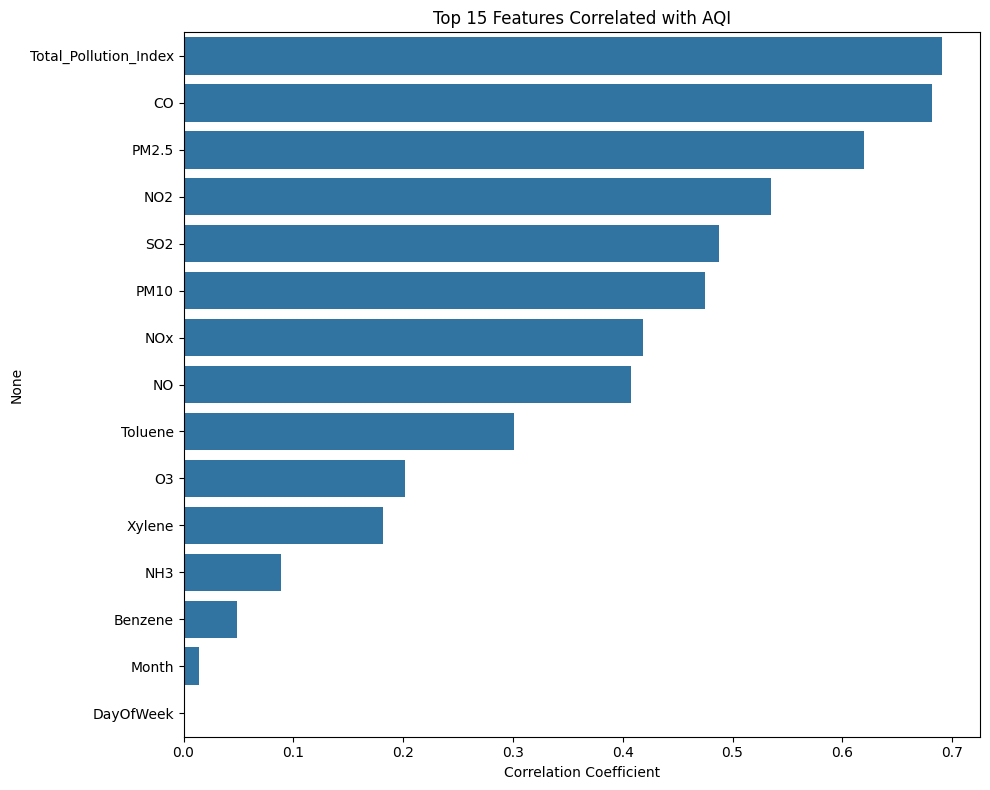

Top 10 features correlated with AQI:
Total_Pollution_Index    0.690862
CO                       0.681945
PM2.5                    0.619382
NO2                      0.534997
SO2                      0.487853
PM10                     0.474834
NOx                      0.418841
NO                       0.407709
Toluene                  0.301335
O3                       0.202081
Name: AQI, dtype: float64


In [47]:
numerical_features = combined_data.select_dtypes(include=[np.number]).columns.tolist()
correlation_with_target = combined_data[numerical_features].corr()['AQI'].sort_values(ascending=False)

# Display top correlated features
plt.figure(figsize=(10, 8))
top_correlated = correlation_with_target[1:16]
sns.barplot(x=top_correlated.values, y=top_correlated.index)
plt.title('Top 15 Features Correlated with AQI')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

print("Top 10 features correlated with AQI:")
print(correlation_with_target[1:11])

# Explainatory Data Analysis

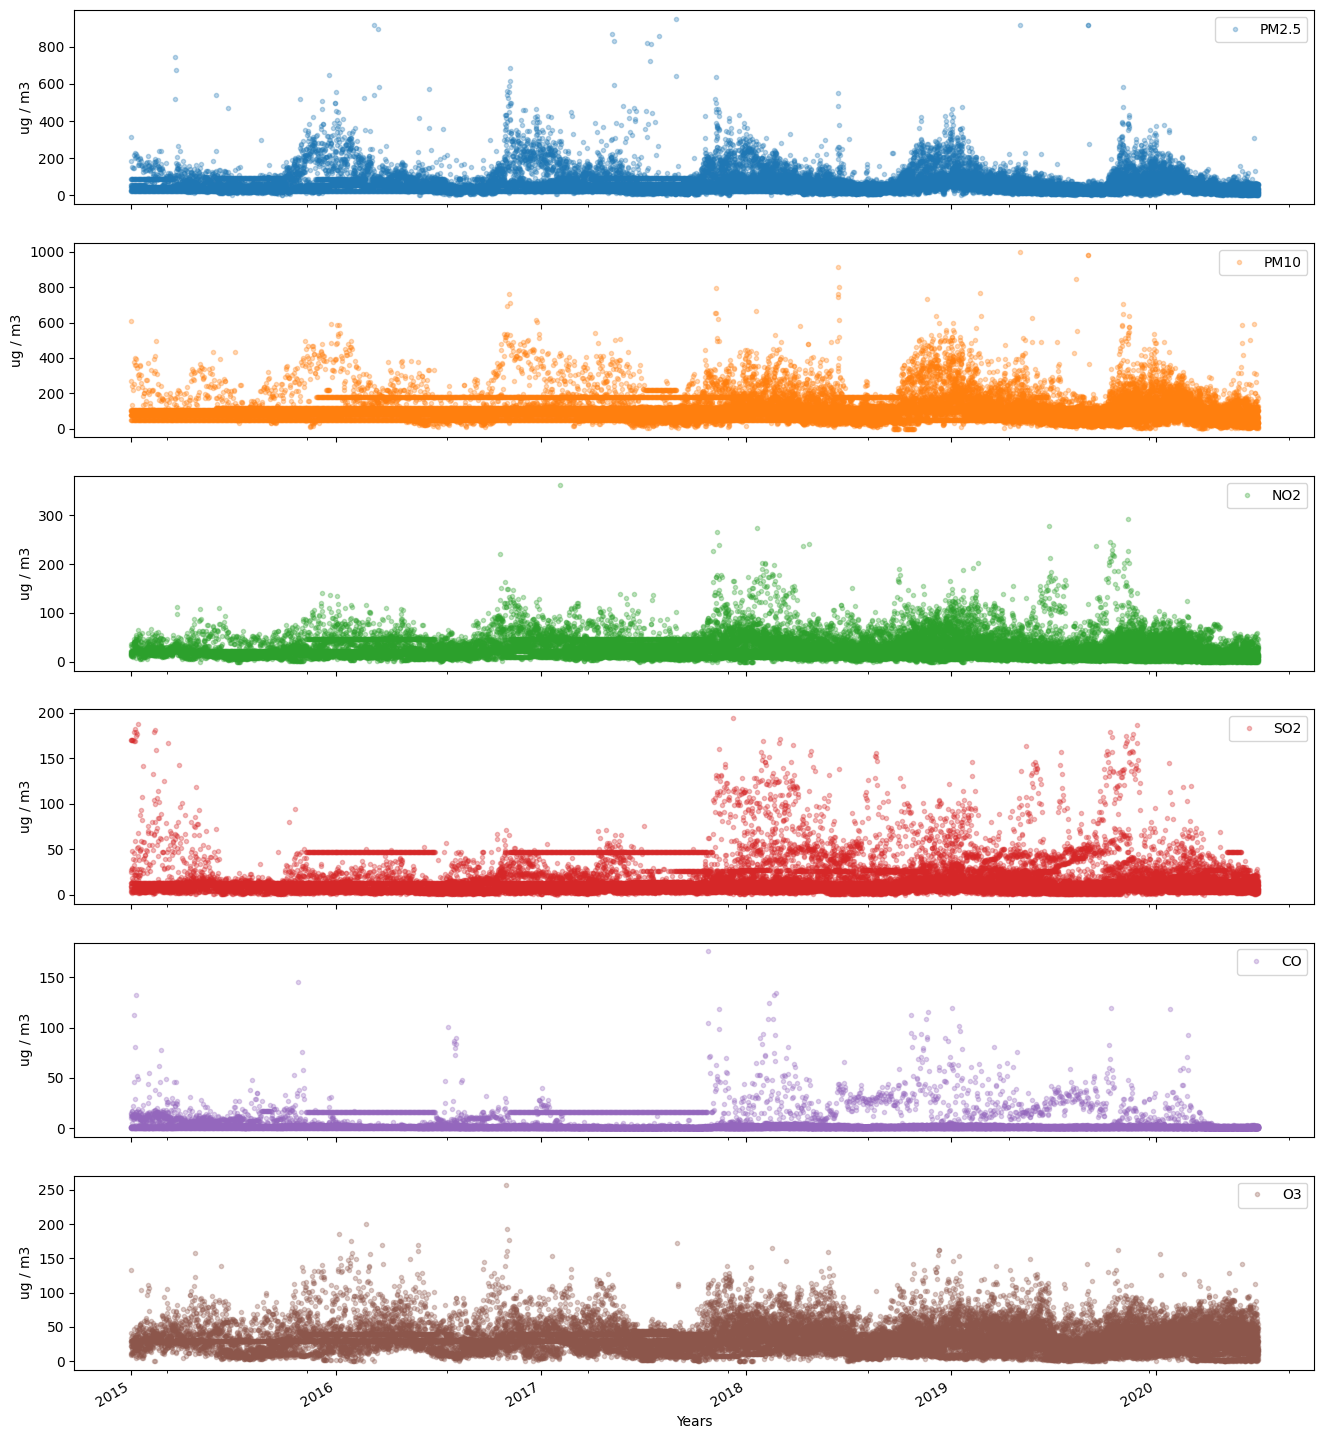

In [48]:
# Plot of variations of key pollutants
pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']
combined_data.set_index('Date',inplace=True)
axes = combined_data[pollutants].plot(marker='.', alpha=0.3, linestyle='None', figsize=(16, 20), subplots=True)
for ax in axes:
    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')

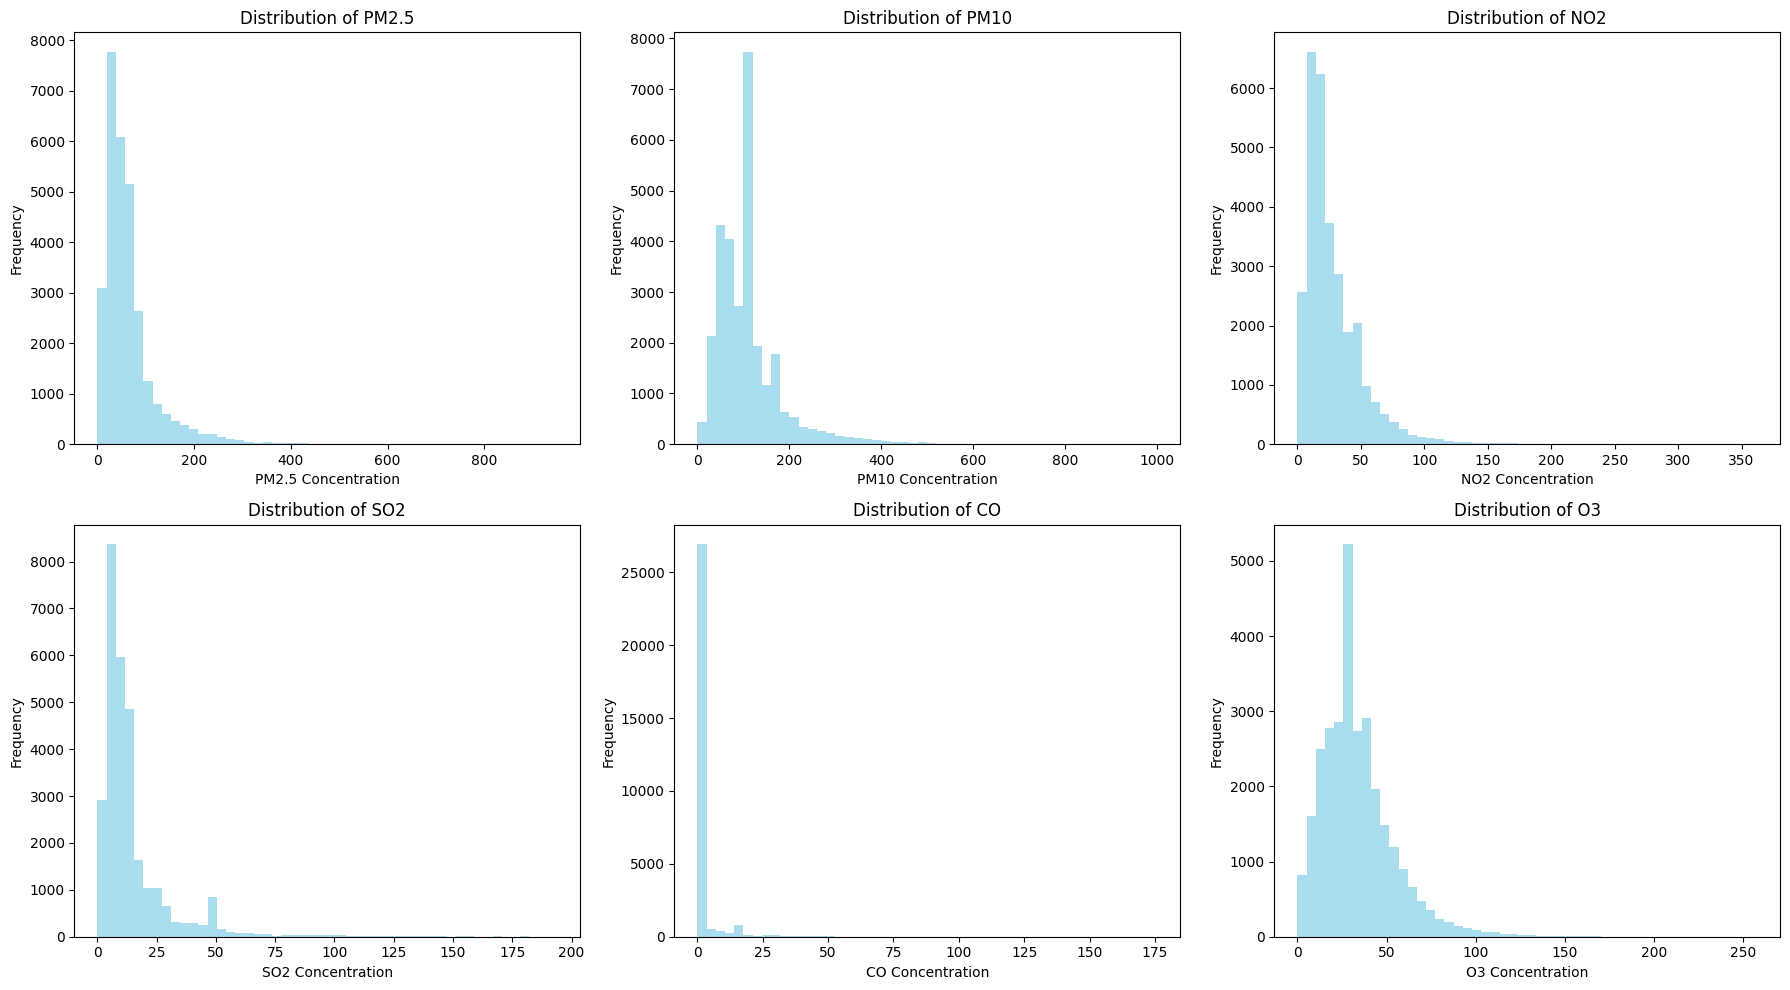

In [49]:
# Distribution of key pollutants
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, pollutant in enumerate(pollutants):
    if pollutant in combined_data.columns:
        axes[i].hist(combined_data[pollutant].dropna(), bins=50, alpha=0.7, color='skyblue')
        axes[i].set_title(f'Distribution of {pollutant}')
        axes[i].set_xlabel(f'{pollutant} Concentration')
        axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()